## 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
data = pd.read_excel("path_data.xlsx")
data

,Process 1,Process 2,Process 3,Process 4,Process 5,Process 6,Process 7,Process 8,Yield
0,1,1,1,1,1,1,1,1,84.516824
1,1,1,1,1,1,1,1,2,86.059395
2,1,1,1,1,1,1,1,3,86.620403
3,1,1,1,1,1,1,2,1,84.342478
4,1,1,1,1,1,1,2,2,82.356679
...,...,...,...,...,...,...,...,...,...
6556,3,3,3,3,3,3,2,2,85.256023
6557,3,3,3,3,3,3,2,3,73.936457
6558,3,3,3,3,3,3,3,1,85.864868
6559,3,3,3,3,3,3,3,2,84.655892


## 전체 평균 구하기

In [31]:
total_mean = data["Yield"].mean()
total_mean

81.69124156024934

## 각 설비에 따른 주효과 구하기

In [54]:
machine_mean = pd.DataFrame(columns=data.columns[:-1].tolist())

for col in data.columns[:-1]:
  machine_mean[col] = data.groupby(col).mean()["Yield"]

machine_mean = machine_mean.reset_index(drop=True)
machine_mean["Machine"] = range(1, 4, 1)
machine_mean # 각 설비에 따른 평균

,Process 1,Process 2,Process 3,Process 4,Process 5,Process 6,Process 7,Process 8,Machine
0,82.653723,82.469903,82.144433,80.682955,80.464640,82.518389,82.264698,83.642175,1
1,82.425581,81.011629,81.404593,82.194763,83.062150,79.013837,82.900319,82.759806,2
2,79.994421,81.592192,81.524699,82.196006,81.546935,83.541499,79.908707,78.671744,3


In [55]:
main_effects = machine_mean - total_mean # 주효과
main_effects["Machine"] = range(1, 4, 1)
main_effects

,Process 1,Process 2,Process 3,Process 4,Process 5,Process 6,Process 7,Process 8,Machine
0,0.962481,0.778662,0.453191,-1.008287,-1.226602,0.827147,0.573457,1.950933,1
1,0.734339,-0.679612,-0.286649,0.503522,1.370908,-2.677404,1.209078,1.068565,2
2,-1.696821,-0.099050,-0.166542,0.504765,-0.144306,1.850257,-1.782534,-3.019498,3


### Mean Plot for Yield

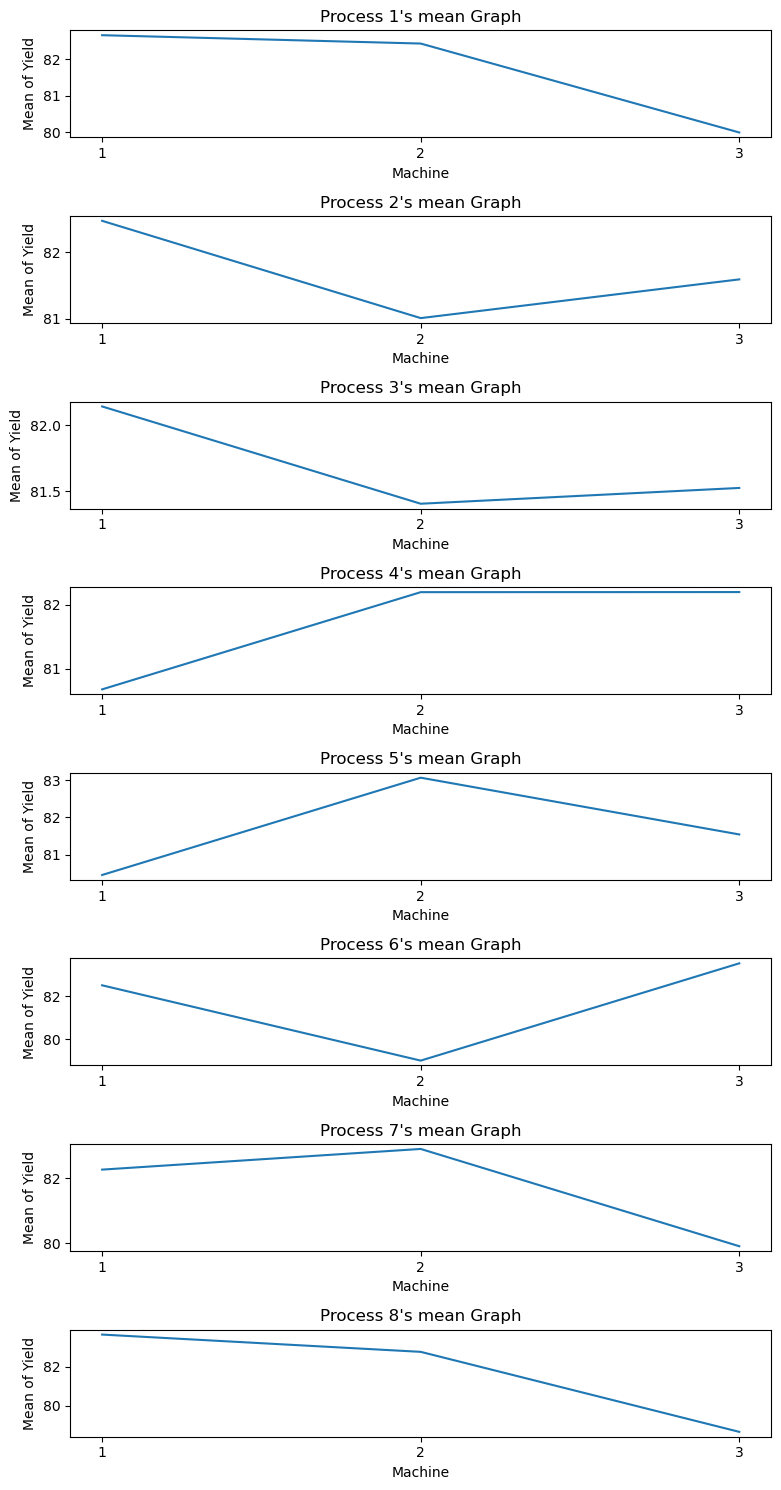

In [66]:
plt.figure(figsize=(8, 15))

for ind, col in enumerate(machine_mean.columns[:-1]):
  plt.subplot(8, 1, ind+1)
  plt.plot(machine_mean.iloc[:, -1], machine_mean[col])
  plt.title(f"{col}'s mean Graph")
  plt.xticks(np.arange(1,4,1))
  plt.xlabel('Machine')
  plt.ylabel('Mean of Yield')
plt.tight_layout()
plt.show()

### Main Effects Plot for Yeild

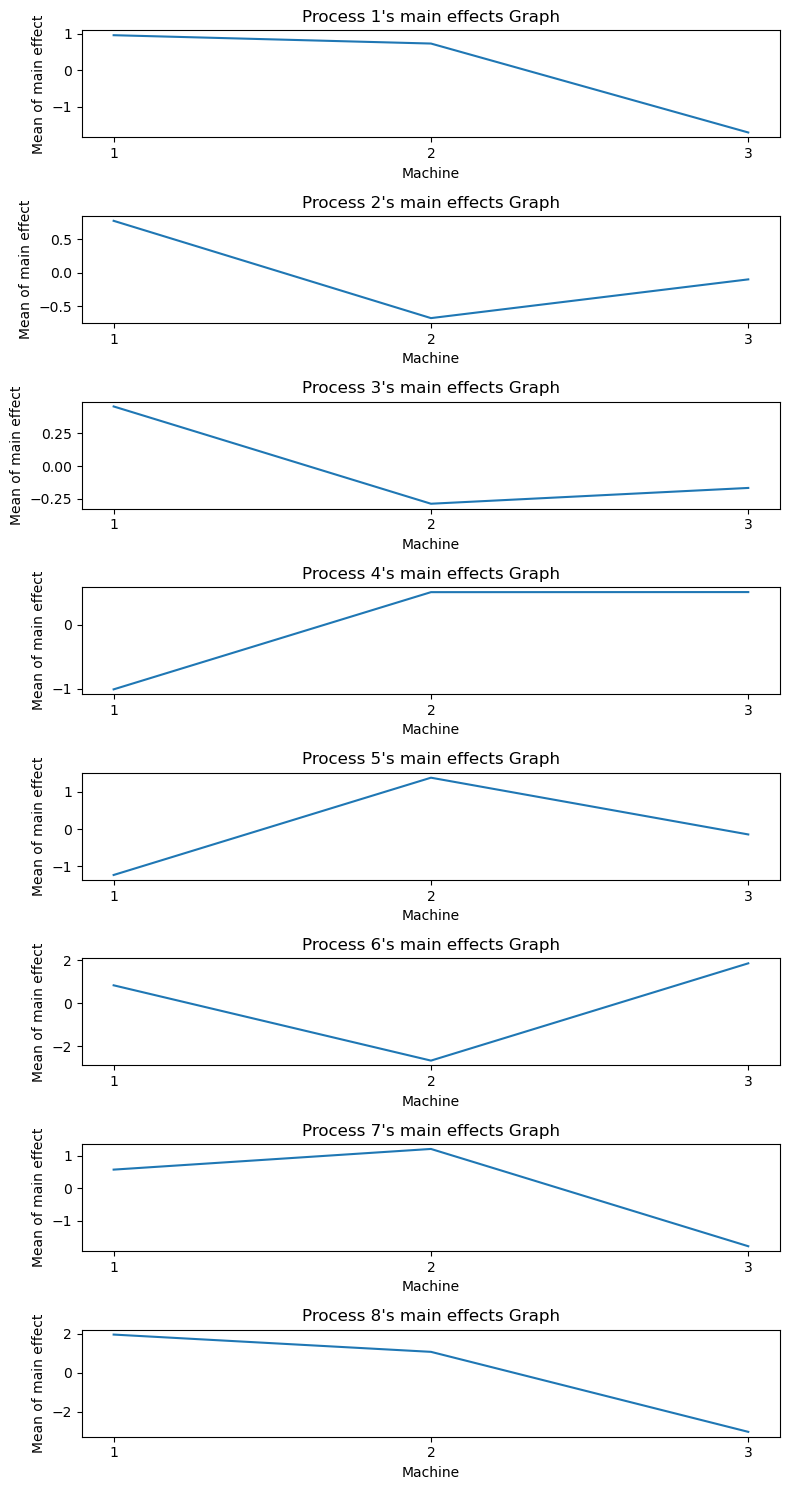

In [65]:
plt.figure(figsize=(8, 15))

for ind, col in enumerate(main_effects.columns[:-1]):
  plt.subplot(8, 1, ind+1)
  plt.plot(main_effects.iloc[:, -1], main_effects[col])
  plt.title(f"{col}'s main effects Graph")
  plt.xticks(np.arange(1,4,1))
  plt.xlabel('Machine')
  plt.ylabel('Mean of main effect')
plt.tight_layout()
plt.show()

## 교호작용 구하기

In [131]:
interaction_means = pd.DataFrame(np.zeros([24, 24]))

for num in range(1, 9, 1):
  row_num = 3*(num-1)
  for i in range(num+1, 9, 1):
    col_num = 3*(i-1)
    # 두 가지의 기계 설비 평균
    processs_mean_dict = data.groupby([f"Process {num}", f"Process {i}"]).mean()["Yield"].to_dict()
    
    for j in range(1, 4, 1):
      for k in range(1, 4, 1):
        # 교호작용 효과
        interaction_means.iloc[row_num + j - 1, col_num + k -1] = processs_mean_dict[(j, k)]
interaction_means

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,83.598264,82.296365,82.066540,83.262988,82.023442,82.674739,81.582985,...,82.149819,83.566163,80.936851,83.458155,83.170099,83.765136,81.025934,83.960214,83.727134,80.273821
1,0.0,0.0,0.0,83.192423,81.725419,82.358901,82.568051,82.687093,82.021598,81.846452,...,82.284704,83.166336,78.199004,85.911403,83.168568,83.775362,80.332814,84.606409,82.758409,79.911924
2,0.0,0.0,0.0,80.619023,79.013104,80.351135,80.602258,79.503243,79.877761,78.619428,...,80.206283,80.822667,77.905657,81.254938,80.455429,81.160459,78.367374,82.359900,81.793876,75.829485
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,82.271309,82.564806,82.573596,81.383735,...,83.776646,84.312261,79.528109,83.569340,83.390309,83.080863,80.938538,84.161566,82.986392,80.261753
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,83.279349,80.116553,79.638987,79.376398,...,80.122553,81.377736,78.697279,82.959874,80.625061,83.266669,79.143158,83.391638,82.361983,77.281266
5,0.0,0.0,0.0,0.000000,0.000000,0.000000,80.882641,81.532420,82.361516,81.288732,...,80.741607,81.865170,78.816124,84.095282,82.778725,82.353426,79.644426,83.373320,82.931044,78.472212
6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.663522,...,83.333708,83.140388,80.568055,82.724854,82.439504,83.924444,80.069349,83.558882,84.335168,78.539248
7,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.330230,...,80.016231,81.928255,78.588278,83.697246,81.650494,82.896019,79.667265,83.345797,81.322574,79.545407
8,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.055113,...,81.290868,82.486523,77.885179,84.202396,82.704097,81.880494,79.989506,84.021845,82.621677,77.930575
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,80.639770,81.675890,77.534017,82.838958,81.485863,80.898387,79.664615,82.511798,81.761820,77.775247


In [129]:
interaction_effects = pd.DataFrame(np.zeros([24, 24]))

for num in range(1, 9, 1):
  row_num = 3*(num-1)
  for i in range(num+1, 9, 1):
    col_num = 3*(i-1)
    # 두 가지의 기계 설비 평균
    processs_mean_dict = data.groupby([f"Process {num}", f"Process {i}"]).mean()["Yield"].to_dict()
    
    for j in range(1, 4, 1):
      for k in range(1, 4, 1):
        # 교호작용 효과
        interaction_effects.iloc[row_num + j - 1, col_num + k -1] = processs_mean_dict[(j, k)] - (total_mean + main_effects.loc[j - 1, f"Process {num}"] + main_effects.loc[k -1, f"Process {i}"])
interaction_effects

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.165879,0.322254,-0.488134,0.156074,-0.343632,0.187558,-0.062452,...,-0.359598,0.085293,0.960532,-1.045825,-0.057081,-0.097664,0.154745,-0.644442,0.004846,0.639596
1,0.0,0.0,0.0,-0.011820,-0.020549,0.032370,-0.310721,0.548161,-0.237440,0.429158,...,0.003429,-0.086392,-1.549173,1.635565,0.169530,0.140703,-0.310233,0.229895,-0.735736,0.505841
2,0.0,0.0,0.0,-0.154059,-0.301705,0.455764,0.154647,-0.204529,0.049882,-0.366706,...,0.356168,0.001099,0.588641,-0.589740,-0.112449,-0.043039,0.155488,0.414547,0.730891,-1.145437
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.651786,0.381551,0.270235,-0.077882,...,1.451049,1.015210,-0.264390,-0.750820,0.346949,-0.598118,0.251169,-0.259271,-0.552076,0.811347
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.814528,-0.608428,-1.206100,-0.626945,...,-0.744770,-0.461041,0.363054,0.097987,-0.960025,1.045962,-0.085937,0.429076,0.281789,-0.710865
5,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1.162742,0.226877,0.935866,0.704826,...,-0.706279,-0.554170,-0.098664,0.652833,0.613076,-0.447844,-0.165232,-0.169805,0.270287,-0.100482
6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.472624,...,1.333581,0.168809,1.101027,-1.269835,-0.278386,0.570934,-0.292549,-0.536484,1.122170,-0.585686
7,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.933924,...,-1.244056,-0.303485,-0.138910,0.442396,-0.327556,0.282348,0.045207,-0.009729,-1.150584,1.160313
8,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.461300,...,-0.089525,0.134677,-0.962116,0.827440,0.605941,-0.853283,0.247342,0.546213,0.028413,-0.574626
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.101121,0.165788,-0.471533,0.305746,0.229451,-0.993646,0.764195,-0.122090,0.010300,0.111790


### Interaction Plot for Yield

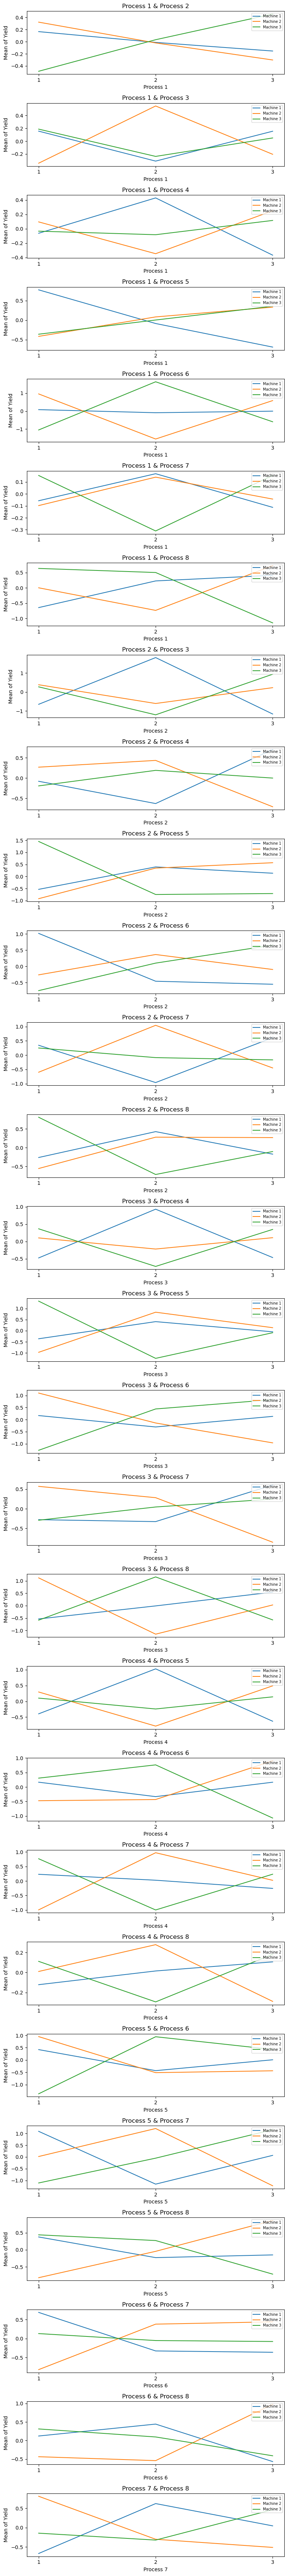

In [195]:
plt.figure(figsize=(8, 70))
total_num = np.sum([i for i in range(1, 8, 1)])

cnt = 1
for num in range(1, 9, 1):
  row_num = 3*(num-1)
  for i in range(num+1, 9, 1):
    col_num = 3*(i-1)
    temp = interaction_effects.iloc[row_num : row_num + 3, col_num : col_num + 3]
    temp = temp.set_index(np.arange(1,4,1))
    
    plt.subplot(total_num, 1, cnt)
    plt.xlabel('X-Axis')
    plt.title(f"Process {num} & Process {i}")
    plt.xticks(np.arange(1,4,1))
    plt.xlabel(f'Process {num}')
    plt.ylabel('Mean of Yield')
    
    for j in range(3):
      plt.plot(temp.iloc[:, j], label=f"Machine {j+1}")
      plt.legend(loc=1, fontsize="x-small")
    
    cnt += 1

plt.tight_layout()
plt.show()

### Interaction Mean Plot

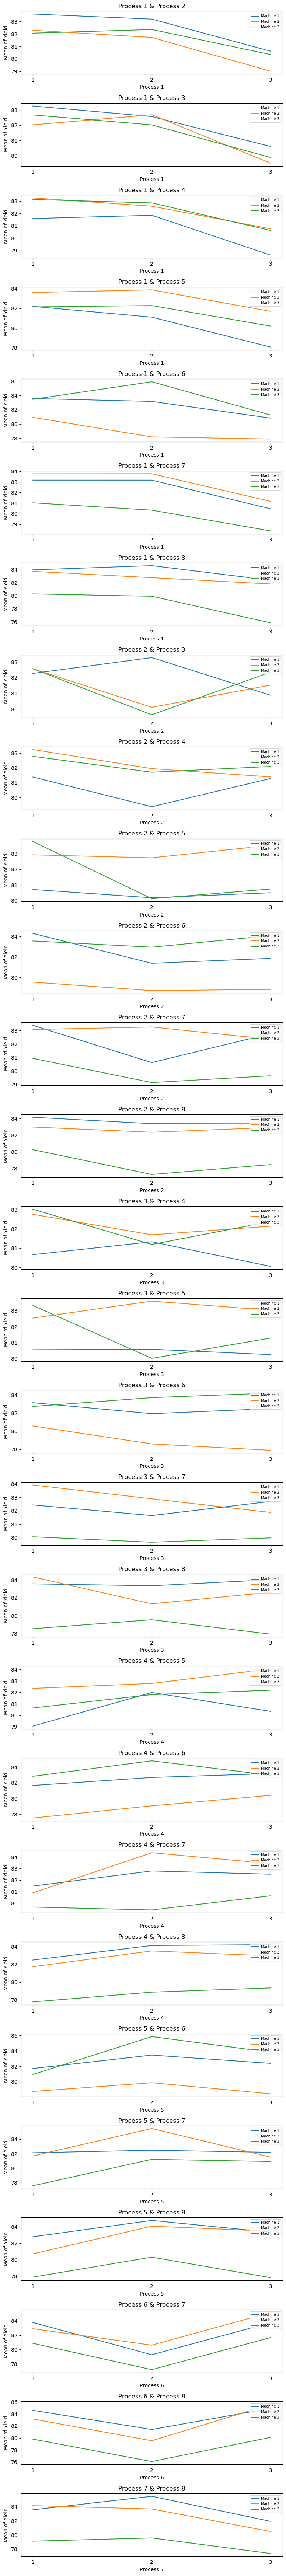

In [196]:
plt.figure(figsize=(8, 70))
total_num = np.sum([i for i in range(1, 8, 1)])

cnt = 1
for num in range(1, 9, 1):
  row_num = 3*(num-1)
  for i in range(num+1, 9, 1):
    col_num = 3*(i-1)
    temp = interaction_means.iloc[row_num : row_num + 3, col_num : col_num + 3]
    temp = temp.set_index(np.arange(1,4,1))
    
    plt.subplot(total_num, 1, cnt)
    plt.xlabel('X-Axis')
    plt.title(f"Process {num} & Process {i}")
    plt.xticks(np.arange(1,4,1))
    plt.xlabel(f'Process {num}')
    plt.ylabel('Mean of Yield')
    
    for j in range(3):
      plt.plot(temp.iloc[:, j], label=f"Machine {j+1}")
      plt.legend(loc=1, fontsize="x-small")
    
    cnt += 1

plt.tight_layout()
plt.show()